In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [77]:
df = pd.read_csv('data/stud.csv')

In [78]:
df['Total Score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['Average Score'] = df['Total Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [79]:
df.drop(columns=['math_score','reading_score','writing_score'], axis=1, inplace=True)


In [80]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333
2,female,group B,master's degree,standard,none,278,92.666667
3,male,group A,associate's degree,free/reduced,none,148,49.333333
4,male,group C,some college,standard,none,229,76.333333


In [81]:
X = df.drop(columns=['Average Score'], axis=1)
y = df['Average Score']

In [82]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,Total Score
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229


In [83]:
y

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Average Score, Length: 1000, dtype: float64

In [84]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandarScaler",numeric_transformer,num_features),
    ]
)

In [85]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,Total Score
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,282
996,male,group C,high school,free/reduced,none,172
997,female,group C,high school,free/reduced,completed,195
998,female,group D,some college,standard,completed,223


In [86]:
X.shape

(1000, 6)

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [88]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    score = r2_score(true,predicted)
    return mae,rmse,score

In [89]:
models = {
    "Linear Regression" : LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "CatBoost Regressor" : CatBoostRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor(),
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for training dataset")
    print("Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("R2 Score:{:.4f}".format(model_train_r2))

    print("-"*40)

    print("Model Performance for testing dataset")
    print("Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("R2 Score:{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*40)
    print("\n")



Linear Regression
Model Performance for training dataset
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
R2 Score:1.0000
----------------------------------------
Model Performance for testing dataset
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
R2 Score:1.0000


Ridge
Model Performance for training dataset
Root Mean Squared Error: 0.0226
Mean Absolute Error: 0.0184
R2 Score:1.0000
----------------------------------------
Model Performance for testing dataset
Root Mean Squared Error: 0.0248
Mean Absolute Error: 0.0198
R2 Score:1.0000


Lasso
Model Performance for training dataset
Root Mean Squared Error: 1.0000
Mean Absolute Error: 0.8010
R2 Score:0.9948
----------------------------------------
Model Performance for testing dataset
Root Mean Squared Error: 1.0925
Mean Absolute Error: 0.8631
R2 Score:0.9947


K-Neighbors Regressor
Model Performance for training dataset
Root Mean Squared Error: 3.9255
Mean Absolute Error: 3.0129
R2 Score:0.9199
-----------------

In [90]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model', 'r2_score']).sort_values(by='r2_score',ascending=False)

,Model,r2_score
0,Linear Regression,1.000000
1,Ridge,0.999997
4,Decision Tree Regressor,0.998375
6,XGB Regressor,0.997606
5,Random Forest Regressor,0.996169
2,Lasso,0.994706
7,CatBoost Regressor,0.990644
8,AdaBoost Regressor,0.989997
3,K-Neighbors Regressor,0.880952


### Linear Model

In [91]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)
print("Accuracy of model is %.2f" %score)


Accuracy of model is 1.00


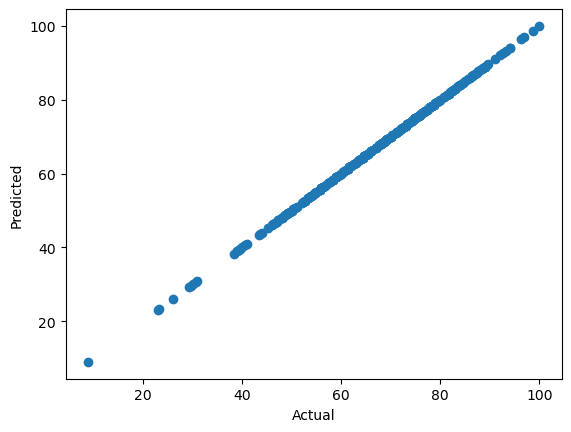

In [92]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [94]:
diff = pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred, "Difference": y_test-y_pred})
diff.head()

,Actual Value,Predicted Value,Difference
521,87.000000,87.000000,0.000000e+00
737,64.000000,64.000000,0.000000e+00
740,75.000000,75.000000,1.421085e-14
660,74.666667,74.666667,1.421085e-14
411,81.666667,81.666667,1.421085e-14
